In [19]:
import os
from data_set import Dataset    
from torch.utils.data import DataLoader
# Define hyperparameters
num_epochs = 1
batch_size = 32
initial_lr = 0.001
data_path =os.path.join( os.getcwd(), "low_resInput")
train_loader = DataLoader(Dataset(data_path), batch_size=batch_size, shuffle=True)
print("Datadset input Completed")

/Users/felix/Documents/Internship實習/2023工研院/Code/low_resInput
['low_0062.JPG', 'low_0060.JPG', 'low_0074.JPG', 'low_0101.JPG', 'low_0061.JPG', 'low_0059.JPG', 'low_0110.JPG', 'low_0058.JPG', 'low_0072.JPG', 'low_0107.JPG', 'low_0073.JPG', 'low_0025.JPG', 'low_0095.JPG', 'low_0057.JPG', 'low_0109.JPG', 'low_0108.JPG', 'low_0044.JPG', 'low_0047.JPG']
/Users/felix/Documents/Internship實習/2023工研院/Code/low_resInput
Datadset input Completed


# Test of Semantics Perception Block

In [34]:
import torch
import torch.nn as nn

class Semantics(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(Semantics, self).__init__()

        # Feature Extractor in Low-Resolution Branch
        self.conv1a = nn.Sequential(
            nn.Conv2d(in_channels, 4, kernel_size=3, stride=2, padding=1),
            nn.ReLU()
        )
        self.conv2a = nn.Sequential(
            nn.Conv2d(4, 8, kernel_size=3, stride=2, padding=1),
            nn.ReLU()
        )
        self.conv3a = nn.Sequential(
            nn.Conv2d(8, 16, kernel_size=3, stride=2, padding=1),
            nn.ReLU()
        )
        self.conv4a = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1),
            nn.ReLU()
        )

        # Semantics Perception Block
        self.conv_inb = nn.Sequential(
            nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.conv1b = nn.Sequential(
            nn.Conv2d(32, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.maxpool1b = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2b = nn.Sequential(
            nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.maxpool2b = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3b = nn.Sequential(
            nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.maxpool3b = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv4b = nn.Sequential(
            nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.maxpool4b = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv5b = nn.Sequential(
            nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.conv6b = nn.Sequential(
            nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=2, dilation=2),
            nn.PReLU()
        )
        self.conv5bd = nn.Sequential(
            nn.Conv2d(32, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.conv4bd = nn.Sequential(
            nn.Conv2d(32, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.conv3bd = nn.Sequential(
            nn.Conv2d(32, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.conv2bd = nn.Sequential(
            nn.Conv2d(32, 16, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.conv1bd = nn.Sequential(
            nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
            nn.PReLU()
        )
        self.maxpool5b = nn.MaxPool2d(kernel_size=2, stride=2)

    def forward(self, input):
        # Feature Extractor in Low-Resolution Branch
        conv1a = self.conv1a(input)
        conv2a = self.conv2a(conv1a)
        conv3a = self.conv3a(conv2a)
        conv4a = self.conv4a(conv3a)
        
        # Semantics Perception Block
        conv_inb = self.conv_inb(conv4a)
        print("conv_inb", conv_inb.shape)
        conv1b = self.conv1b(conv_inb)
        print("conv1b", conv1b.shape)
        maxpool1b = self.maxpool1b(conv1b)
        print("maxpool1b", maxpool1b.shape)
        conv2b = self.conv2b(maxpool1b)
        print("conv2b", conv2b.shape)
        maxpool2b = self.maxpool2b(conv2b)
        print("maxpool2b", maxpool2b.shape)
        conv3b = self.conv3b(maxpool2b)
        print("conv3b", conv3b.shape)
        maxpool3b = self.maxpool3b(conv3b)
        print("maxpool3b", maxpool3b.shape)
        conv4b = self.conv4b(maxpool3b)
        print("conv4b.shape" , conv4b.shape)
        maxpool4b = self.maxpool4b(conv4b)
        print("maxpool4b.shape" , maxpool4b.shape)
        conv5b = self.conv5b(maxpool4b)
        print("conv5b.shape" , conv5b.shape)
        conv6b = self.conv6b(conv5b)
        print("conv6b.shape" , conv6b.shape)
        conv5bd = self.conv5bd(torch.cat([conv5b, conv6b], dim=1))
        print("conv5bd.shape" , conv5bd.shape)

        print("UPconv5bd.shape" , self.upsample(conv5bd).shape)
        UPconv5bd_resized = nn.functional.interpolate(self.upsample(conv5bd), size=(3, 3), mode='bilinear')
        conv4bd = self.conv4bd(torch.cat([UPconv5bd_resized, conv4b], dim=1))
        print("UPconv4bd.shape" , self.upsample(conv4bd).shape)
        conv3bd = self.conv3bd(torch.cat([self.upsample(conv4bd), conv3b], dim=1))
        print("UPconv3bd.shape" , self.upsample(conv3bd).shape)
        conv2bd = self.conv2bd(torch.cat([self.upsample(conv3bd), conv2b], dim=1))
        print("UPconv2bd.shape" , self.upsample(conv2bd).shape)
        conv1bd = self.conv1bd(torch.cat([self.upsample(conv2bd), conv1b], dim=1))
        print("conv1bd.shape" , conv1bd.shape)
        print("conv_inb", conv_inb.shape)
        
        # print("torch.add(conv1bd,conv1b)", torch.add(conv1bd,conv1b).shape)
        # conv7 = self.conv7(self.upsample(conv1bd)+conv1b)
        maxpool5b = self.maxpool5b(conv1bd+conv_inb)
        
        # maxpool5b = self.maxpool5b(torch.cat([conv1bd,conv1b],dim=1))
        # conv7 = self.conv7(torch.cat([self.upsample(conv1bd), conv1b], dim=1))
        # conv7=self.upsample(conv7)
        # print("conv7", conv7.shape)
        # print("conv1bd", conv1bd.shape)
        # print("maxpool5b", self.upsample(maxpool5b).shape)

        #! The description of the last convolution is Maxpool but the graph is showed as a convolution7 and since the size too small I upsample it 

        return self.upsample(maxpool5b)

    def upsample(self, x):
        return nn.functional.interpolate(x, scale_factor=2, mode='bilinear')


conv_inb torch.Size([18, 32, 24, 24])
conv1b torch.Size([18, 16, 24, 24])
maxpool1b torch.Size([18, 16, 12, 12])
conv2b torch.Size([18, 16, 12, 12])
maxpool2b torch.Size([18, 16, 6, 6])
conv3b torch.Size([18, 16, 6, 6])
maxpool3b torch.Size([18, 16, 3, 3])
conv4b.shape torch.Size([18, 16, 3, 3])
maxpool4b.shape torch.Size([18, 16, 1, 1])
conv5b.shape torch.Size([18, 16, 1, 1])
conv6b.shape torch.Size([18, 16, 1, 1])
conv5bd.shape torch.Size([18, 16, 1, 1])
UPconv5bd.shape torch.Size([18, 16, 2, 2])
UPconv4bd.shape torch.Size([18, 16, 6, 6])
UPconv3bd.shape torch.Size([18, 16, 12, 12])
UPconv2bd.shape torch.Size([18, 16, 24, 24])
conv1bd.shape torch.Size([18, 32, 24, 24])
conv_inb torch.Size([18, 32, 24, 24])
(18, 32, 24, 24)


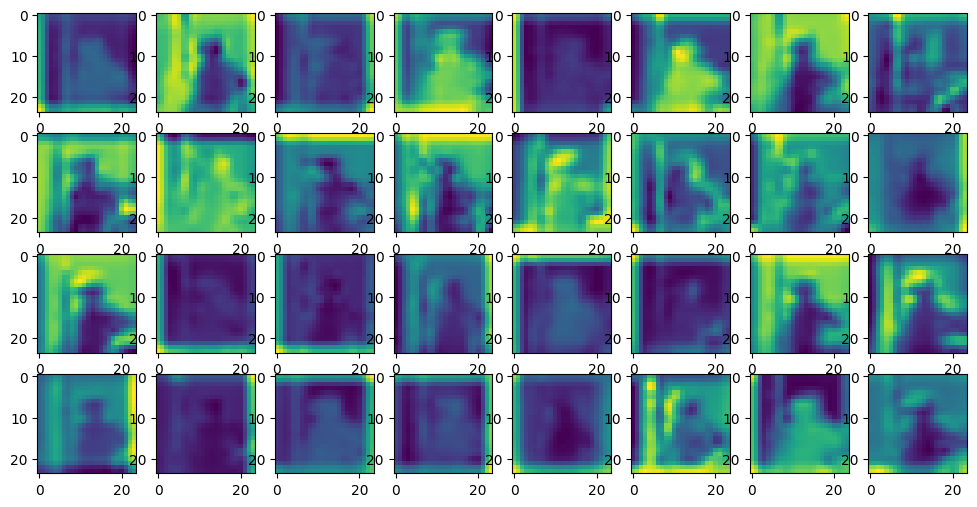

In [35]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

def train(model, train_loader, device):
    model.train()
    for inputs, targets in train_loader:
        inputs = inputs.to(device)
        targets = targets.to(device)
    feature_maps=model(inputs)
    # Convert the tensor to a numpy array
    feature_maps = feature_maps.detach().numpy()
    print(feature_maps.shape)

    # Plot the feature maps
    fig, axes = plt.subplots(nrows=4, ncols=8, figsize=(12, 6))
    for i, ax in enumerate(axes.flat):
        ax.imshow(feature_maps[0][i])
    plt.show()
    return 

# Create the Network model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
net = Semantics(3,32)
model = net.to(device)
for epoch in range(num_epochs):
    train(model, train_loader , device)
       